<a href="https://colab.research.google.com/github/Galostudios/lightning-balloon-pop/blob/main/BitcoinTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
2191/2191 - 6s - loss: 1.2715e-04 - 6s/epoch - 3ms/step
Epoch 2/100
2191/2191 - 4s - loss: 5.1026e-05 - 4s/epoch - 2ms/step
Epoch 3/100
2191/2191 - 4s - loss: 4.8633e-05 - 4s/epoch - 2ms/step
Epoch 4/100
2191/2191 - 4s - loss: 3.8315e-05 - 4s/epoch - 2ms/step
Epoch 5/100
2191/2191 - 6s - loss: 3.7785e-05 - 6s/epoch - 3ms/step
Epoch 6/100
2191/2191 - 4s - loss: 3.7601e-05 - 4s/epoch - 2ms/step
Epoch 7/100
2191/2191 - 4s - loss: 3.7512e-05 - 4s/epoch - 2ms/step
Epoch 8/100
2191/2191 - 4s - loss: 3.5588e-05 - 4s/epoch - 2ms/step
Epoch 9/100
2191/2191 - 4s - loss: 3.5416e-05 - 4s/epoch - 2ms/step
Epoch 10/100
2191/2191 - 4s - loss: 3.4118e-05 - 4s/epoch - 2ms/step
Epoch 11/100
2191/2191 - 4s - loss: 3.3679e-05 - 4s/epoch - 2ms/step
Epoch 12/100
2191/2191 - 4s - loss: 3.3340e-05 - 4s/epoch - 2ms/step
Epoch 13/100
2191/2191 - 4s - loss: 3.2484e-05 - 4s/epoch - 2ms/step
Epoch 14/100
2191/2191 - 4s - loss: 3.0109e-05 - 4s/epoch - 2ms/step
Epoch 15/100
2191/2191 - 4s - loss: 3.2370e

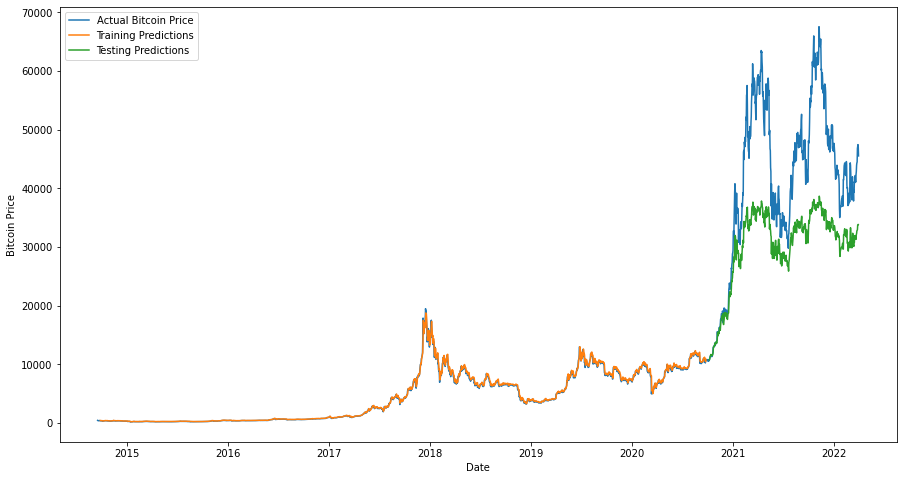

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (Replace this URL with the path to your own dataset)
file_path = "/content/BTC-USD.csv"
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Prepare the data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential([
    LSTM(50, input_shape=(1, look_back)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert the predictions back to the original price scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Visualize the results
plt.figure(figsize=(15, 8))
plt.plot(df['Close'], label='Actual Bitcoin Price')
plt.plot(pd.DataFrame(train_predict, index=df.index[look_back:len(train_predict)+look_back]), label='Training Predictions')
plt.plot(pd.DataFrame(test_predict, index=df.index[len(train_predict)+(look_back*2)+1:len(data)-1]), label='Testing Predictions')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

